<a href="https://colab.research.google.com/github/gvogiatzis/trafficsim/blob/main/suptrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/gvogiatzis/trafficsim.git

In [ ]:
cd trafficsim

In [3]:
!wget "https://7d9c-80-195-93-221.ngrok-free.app/sumo_data/flowmat.txt"

--2023-07-04 17:58:47--  https://7d9c-80-195-93-221.ngrok-free.app/sumo_data/flowmat.txt
Resolving 7d9c-80-195-93-221.ngrok-free.app (7d9c-80-195-93-221.ngrok-free.app)... 3.124.142.205, 3.125.209.94, 18.158.249.75, ...
Connecting to 7d9c-80-195-93-221.ngrok-free.app (7d9c-80-195-93-221.ngrok-free.app)|3.124.142.205|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-07-04 17:58:47 ERROR 404: Not Found.



In [12]:
from rl import SupervisedLearningPretrainer

import matplotlib.pyplot as plt
import torch
import tqdm
import numpy as np

from rl.models import MLPnet, loadModel, saveModel, loadModel_from_dict
import matplotlib.pyplot as plt

num_epochs = 5
network_layers = "1024x1024"
dataset_size = 100000
network_layers = [int(s) for s in network_layers.split("x") if s.isnumeric()]
out_model_fname = "sup_model.pt"
flowmat_fname = "flowmat.txt"

Generating dataset:


100%|██████████| 100000/100000 [00:09<00:00, 11027.33it/s]


Epoch 1/5 Training:

100%|██████████| 1251/1251 [00:16<00:00, 73.88it/s]


Avg Training loss: 3.3259 Avg Training Acc: 23.4 Testing:

Avg Test loss: 8.4952 Avg Test Acc: 7.3

Epoch 2/5 Training:

100%|██████████| 1251/1251 [00:17<00:00, 73.58it/s]


Avg Training loss: 1.2527 Avg Training Acc: 56.7 Testing:

Avg Test loss: 1.1574 Avg Test Acc: 58.3

Epoch 3/5 Training:

100%|██████████| 1251/1251 [00:17<00:00, 73.50it/s]


Avg Training loss: 0.9168 Avg Training Acc: 66.9 Testing:

Avg Test loss: 1.0323 Avg Test Acc: 62.1

Epoch 4/5 Training:

100%|██████████| 1251/1251 [00:17<00:00, 71.38it/s]


Avg Training loss: 0.7373 Avg Training Acc: 73.0 Testing:

Avg Test loss: 1.0059 Avg Test Acc: 63.5

Epoch 5/5 Training:

100%|██████████| 1251/1251 [00:17<00:00, 70.66it/s]


Avg Training loss: 0.6045 Avg Training Acc: 78.0 Testing:

Avg Test loss: 0.9897 Avg Test Acc: 64.7

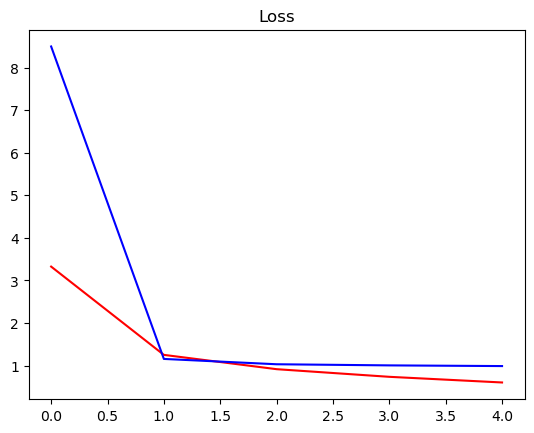

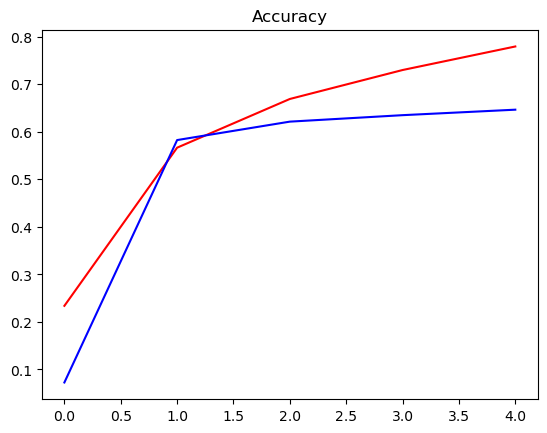

In [13]:
dataset = []
W = np.loadtxt(flowmat_fname)

input_dim, output_dim = W.shape
Wtorch = torch.tensor(W,dtype=torch.float32)
print("Generating dataset:")
for i in tqdm.tqdm(range(dataset_size)):
    x = 100*torch.rand(size=(input_dim,), dtype=torch.float32)
    a = np.argsort(x @ Wtorch)
    t = a[0]
    dataset.append((x, t))
model = MLPnet(input_dim,*network_layers,output_dim)
trainer = SupervisedLearningPretrainer(dataset, model,use_gpu=True)

stats = trainer.train_epochs(num_epochs)

saveModel(model, out_model_fname)
plt.figure()
plt.title("Loss")
plt.plot(stats["training_loss_series"], 'r-')
plt.plot(stats["test_loss_series"], 'b-')
plt.figure()
plt.title("Accuracy")
plt.plot(stats["training_acc_series"], 'r-')
plt.plot(stats["test_acc_series"], 'b-')
plt.show()

In [10]:
output_dim

72

In [11]:
input_dim

256